In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\housing.csv')
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [36]:
df.shape

(545, 13)

In [20]:
con=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for i in con:
    df=df.replace({i:{'yes':1, 'no':0}})

In [21]:
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].head(3)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1,0,0,0,1,2,1
1,1,0,0,0,1,3,0
2,1,0,1,0,0,2,1


In [75]:
pd.get_dummies(data=df,columns=['furnishingstatus'],dtype=int).head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0


In [105]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
furnishingstatus    object
dtype: object

In [30]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [31]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [32]:
df.duplicated().sum()

0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
mainroad,545.0,8.587156e-01,3.486347e-01,0.0,1.0,1.0,1.0,1.0
guestroom,545.0,1.779817e-01,3.828487e-01,0.0,0.0,0.0,0.0,1.0
basement,545.0,3.504587e-01,4.775519e-01,0.0,0.0,0.0,1.0,1.0
hotwaterheating,545.0,4.587156e-02,2.093987e-01,0.0,0.0,0.0,0.0,1.0
airconditioning,545.0,3.155963e-01,4.651799e-01,0.0,0.0,0.0,1.0,1.0


### Exploratory Data Analysis

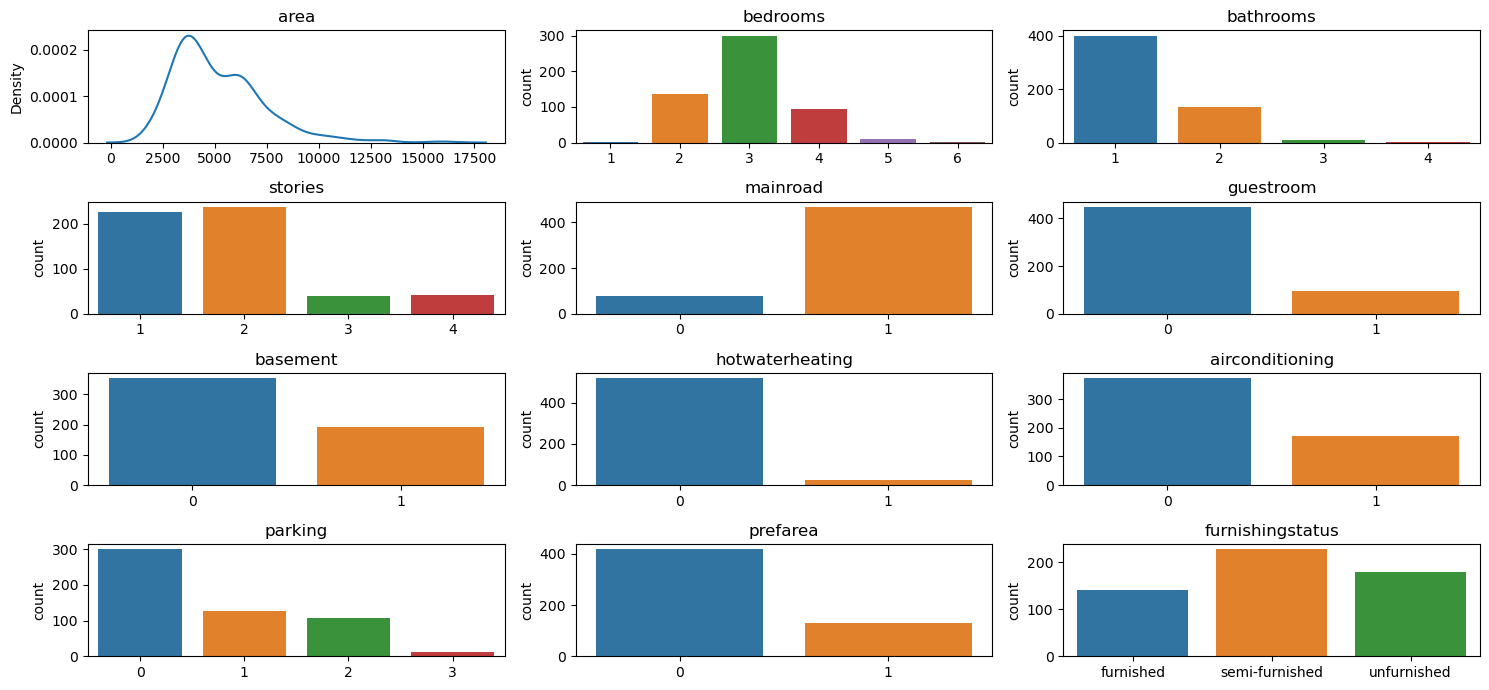

In [41]:
fig, axes = plt.subplots(4,3, figsize=(15,7))

sns.kdeplot(data=df, x='area', ax=axes[0,0]).set(xlabel='', title='area')
sns.countplot(data=df, x='bedrooms', ax=axes[0,1]).set(xlabel='', title='bedrooms')
sns.countplot(data=df, x='bathrooms', ax=axes[0,2]).set(xlabel='', title='bathrooms')
sns.countplot(data=df, x='stories', ax=axes[1,0]).set(xlabel='', title='stories')
sns.countplot(data=df, x='mainroad', ax=axes[1,1]).set(xlabel='', title='mainroad')
sns.countplot(data=df, x='guestroom', ax=axes[1,2]).set(xlabel='', title='guestroom')

sns.countplot(data=df, x='basement', ax=axes[2,0]).set(xlabel='', title='basement')
sns.countplot(data=df, x='hotwaterheating', ax=axes[2,1]).set(xlabel='', title='hotwaterheating')
sns.countplot(data=df, x='airconditioning', ax=axes[2,2]).set(xlabel='', title='airconditioning')
sns.countplot(data=df, x='parking', ax=axes[3,0]).set(xlabel='', title='parking')
sns.countplot(data=df, x='prefarea', ax=axes[3,1]).set(xlabel='', title='prefarea')
sns.countplot(data=df, x='furnishingstatus', ax=axes[3,2]).set(xlabel='', title='furnishingstatus')
plt.tight_layout()
plt.show()

[Text(0.5, 0, ''), Text(0.5, 1.0, 'area')]

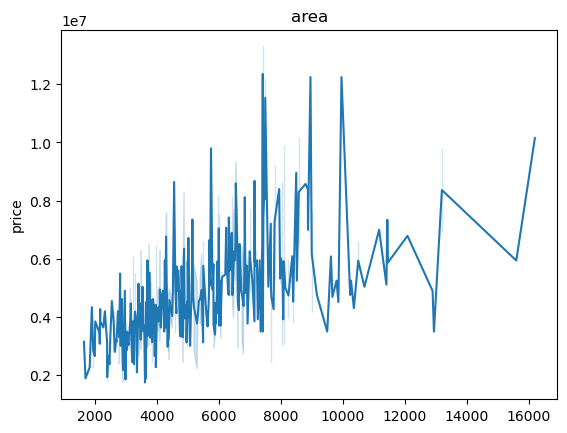

In [48]:

sns.lineplot(x='area',y='price',data=df).set(xlabel='',title='area')


#### In the above graph, we understood area is a good predictor of house price prediction

so we are creating a linear regression object to predict price of house by area

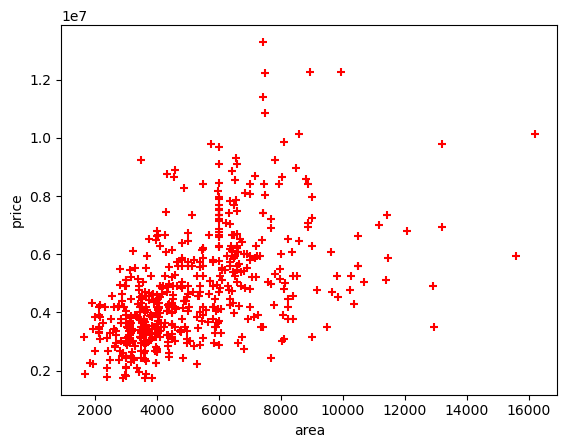

In [107]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.show()


In [79]:
data=df.drop('furnishingstatus',axis=1).head(3)

In [91]:
new_df =data.drop('price', axis='columns')
price = data.price


In [92]:
reg =LinearRegression()
reg.fit(new_df, price)

LinearRegression()

In [95]:
reg.coef_

array([  -470.95582711, -25883.94739836, -85384.02252943, -68575.95866307,
            0.        ,      0.        ,  25883.94739836,      0.        ,
       -25883.94739836, -42692.01126471,  42692.01126471])

In [98]:
reg.intercept_

17343099.906457137

In [99]:
#prediction price for 4400 m2 
42692.01126471*4400+17343099.906457137

205187949.47118115

In [100]:
#prediction price for 5800 m2
42692.01126471*5800+17343099.906457137

264956765.24177516

Like this, we can predict every price for each area that we want to calculate